# linear regression

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import scipy as sc
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
#EDA process

In [5]:
data = pd.read_csv('C:\\Users\\asus\\Downloads\\delivery_time.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
#There is no null values in the model
#There are 2 columns and 21 rows
#Data types is correct according to the data

In [6]:
data.value_counts()

Delivery Time  Sorting Time
8.00           2               1
17.90          10              1
24.00          9               1
21.50          5               1
21.00          10              1
19.83          8               1
19.75          6               1
19.00          7               1
18.75          9               1
18.11          7               1
17.83          7               1
9.50           3               1
16.68          7               1
15.35          6               1
14.88          4               1
13.75          6               1
13.50          4               1
12.03          3               1
11.50          3               1
10.75          4               1
29.00          10              1
dtype: int64

In [ ]:
#No values are repeated here

In [9]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


<function matplotlib.pyplot.show(close=None, block=None)>

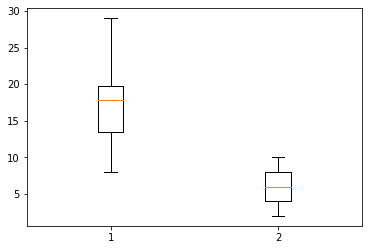

In [7]:
plt.boxplot(data) 
plt.show

In [ ]:
# The boxplot shows that there is no outliers

In [9]:
#Skewness
data.skew()

Delivery Time    0.352390
Sorting Time     0.047115
dtype: float64

In [10]:
#Kurtosis
data.kurt()

Delivery Time    0.317960
Sorting Time    -1.148455
dtype: float64

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

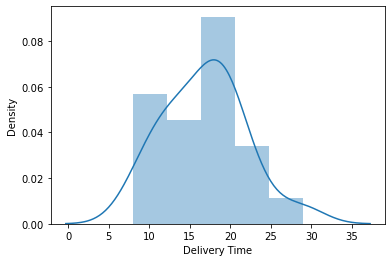

In [11]:
sns.distplot(data['Delivery Time'])

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

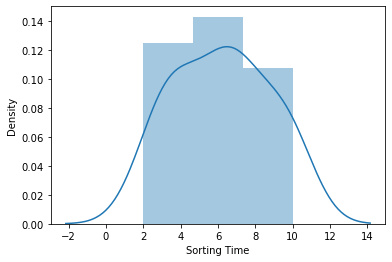

In [12]:
sns.distplot(data['Sorting Time'])

In [10]:
data.corr()
#moderately correlated

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [ ]:
#Renaming the columns to ease the process

In [14]:
data=data.rename(columns={'Delivery Time':'DT'})

In [15]:
data=data.rename(columns={'Sorting Time':'ST'})
data.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


<AxesSubplot:xlabel='DT', ylabel='ST'>

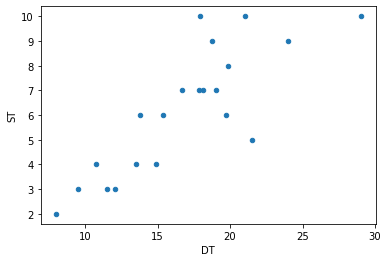

In [16]:
data.plot.scatter(x='DT',y='ST')

In [ ]:
#Model Building

In [14]:
model = smf.ols("data.iloc[:,0]~data.iloc[:,1]",data = data).fit()
model

<AxesSubplot:xlabel='DT', ylabel='ST'>

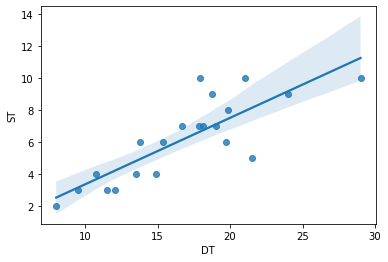

In [15]:
sns.regplot(x='DT',y='ST',data=data)

In [16]:
#parameters
model.params

Intercept          6.582734
data.iloc[:, 1]    1.649020
dtype: float64

In [17]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues) 

Intercept          3.823349
data.iloc[:, 1]    6.387447
dtype: float64 
 Intercept          0.001147
data.iloc[:, 1]    0.000004
dtype: float64


In [18]:
d1 = data.iloc[:,1]

In [19]:
data_p=pd.DataFrame(d1,columns=['ST'])

In [20]:
dp = model.predict(data_p)
dp

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [21]:
#errors
e = data.iloc[:,0]-dp
e

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [22]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [24]:
#p value
model.pvalues

Intercept          0.001147
data.iloc[:, 1]    0.000004
dtype: float64

In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(data.DT,dp))
rmse

2.7916503270617654

In [ ]:
#Model Description
p value of model is less than 0.5 which is fine and there is less difference between Rsquare value and adjusted Rsquare value.



In [ ]:
# Using transformation for better results

In [17]:
d1=np.log10(data['DT'])
d2=np.log10(data['ST'])
datalog = pd.DataFrame(data=(d1,d2))
datalog

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
DT,1.322219,1.130334,1.295567,1.380211,1.462398,1.186108,1.278754,0.977724,1.252853,1.273001,...,1.031408,1.222196,1.060698,1.080266,1.172603,1.138303,1.257918,0.90309,1.251151,1.332438
ST,1.000000,0.602060,0.778151,0.954243,1.000000,0.778151,0.845098,0.477121,1.000000,0.954243,...,0.602060,0.845098,0.477121,0.477121,0.602060,0.778151,0.845098,0.30103,0.845098,0.698970


In [18]:
data1 = datalog.transpose()

<AxesSubplot:xlabel='DT', ylabel='ST'>

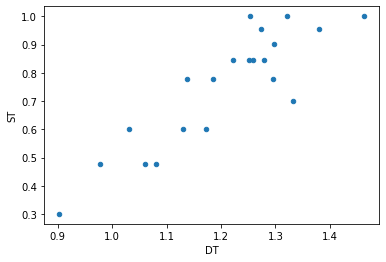

In [19]:
data1.plot.scatter(x='DT',y='ST')

<AxesSubplot:xlabel='DT', ylabel='ST'>

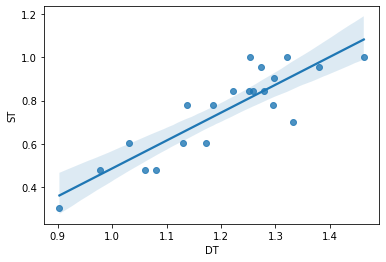

In [20]:
sns.regplot(x='DT',y='ST',data=data1)

In [21]:
d1=np.sqrt(data['DT'])
d1

0     4.582576
1     3.674235
2     4.444097
3     4.898979
4     5.385165
5     3.917908
6     4.358899
7     3.082207
8     4.230839
9     4.330127
10    4.453089
11    3.278719
12    4.084116
13    3.391165
14    3.468429
15    3.857460
16    3.708099
17    4.255585
18    2.828427
19    4.222558
20    4.636809
Name: DT, dtype: float64

In [22]:
d2=np.sqrt(data['ST'])

In [23]:
datasq=pd.DataFrame(data=(d1,d2))
datasq

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
DT,4.582576,3.674235,4.444097,4.898979,5.385165,3.917908,4.358899,3.082207,4.230839,4.330127,...,3.278719,4.084116,3.391165,3.468429,3.85746,3.708099,4.255585,2.828427,4.222558,4.636809
ST,3.162278,2.000000,2.449490,3.000000,3.162278,2.449490,2.645751,1.732051,3.162278,3.000000,...,2.000000,2.645751,1.732051,1.732051,2.00000,2.449490,2.645751,1.414214,2.645751,2.236068


In [24]:
data2=datasq.transpose()

<AxesSubplot:xlabel='DT', ylabel='ST'>

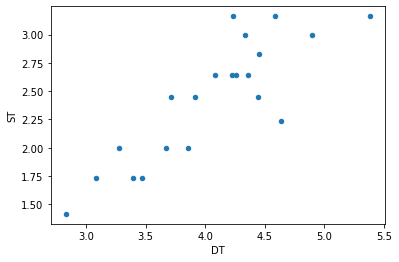

In [25]:
data2.plot.scatter(x='DT',y='ST')

In [26]:
d1=np.exp(data['DT'])
d2=np.exp(data['ST'])

In [27]:
dataexp=pd.DataFrame(data=(d1,d2))
dataexp

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
DT,1.318816e+09,729416.369848,3.778470e+08,2.648912e+10,3.931334e+12,4.638956e+06,1.784823e+08,13359.726830,5.941160e+07,1.390022e+08,...,46630.028454,1.754010e+07,98715.771011,167711.412740,2.899358e+06,936589.158233,7.329478e+07,2980.957987,5.539501e+07,2.174360e+09
ST,2.202647e+04,54.598150,4.034288e+02,8.103084e+03,2.202647e+04,4.034288e+02,1.096633e+03,20.085537,2.202647e+04,8.103084e+03,...,54.598150,1.096633e+03,20.085537,20.085537,5.459815e+01,403.428793,1.096633e+03,7.389056,1.096633e+03,1.484132e+02


In [28]:
data3=dataexp.transpose()

<AxesSubplot:xlabel='DT', ylabel='ST'>

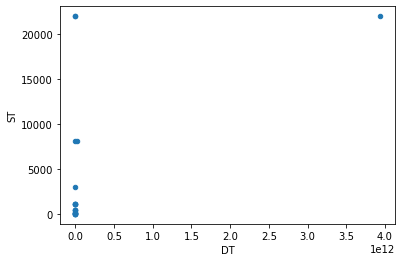

In [29]:
data3.plot.scatter(x='DT',y='ST')

In [30]:
d1=1/(data['DT'])
d2=1/(data['ST'])
datare = pd.DataFrame(data=(d1,d2))
data4=datasq.transpose()

<AxesSubplot:xlabel='DT', ylabel='ST'>

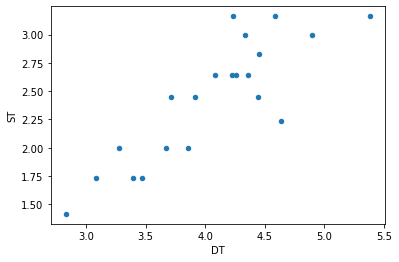

In [31]:
data4.plot.scatter(x='DT',y='ST')

<AxesSubplot:xlabel='DT', ylabel='ST'>

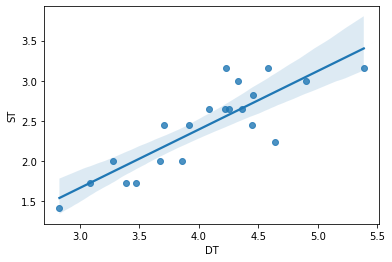

In [32]:
sns.regplot(x='DT',y='ST',data=data4)

## 2nd problem in Linear regression

In [ ]:
#To build a linear model is to find the predicted Salary using Experience.
y=Bo+B1x
y = dependent variable(Salary)
x = independent variable (Experience)
Bo,B1 are parameters

In [35]:
data=pd.read_csv('C:\\Users\\asus\\Downloads\\Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
#EDA process

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
#There is no null value
#There is2 columns and 30 rows
#Data type is float64

In [36]:
data.value_counts()

YearsExperience  Salary  
1.1              39343.0     1
1.3              46205.0     1
10.3             122391.0    1
9.6              112635.0    1
9.5              116969.0    1
9.0              105582.0    1
8.7              109431.0    1
8.2              113812.0    1
7.9              101302.0    1
7.1              98273.0     1
6.8              91738.0     1
6.0              93940.0     1
5.9              81363.0     1
5.3              83088.0     1
5.1              66029.0     1
4.9              67938.0     1
4.5              61111.0     1
4.1              57081.0     1
4.0              56957.0     1
                 55794.0     1
3.9              63218.0     1
3.7              57189.0     1
3.2              64445.0     1
                 54445.0     1
3.0              60150.0     1
2.9              56642.0     1
2.2              39891.0     1
2.0              43525.0     1
1.5              37731.0     1
10.5             121872.0    1
dtype: int64

In [ ]:
#No values are repeated here

<function matplotlib.pyplot.show(close=None, block=None)>

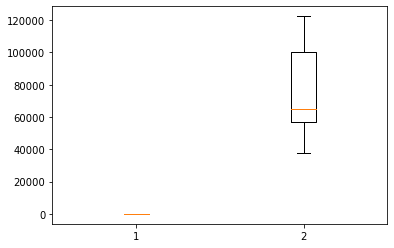

In [37]:
plt.boxplot(data) 
plt.show

In [ ]:
# The box plot shows that there is no outliers

In [38]:
#Skewness
data.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [39]:
#Kurtosis
data.kurt()

YearsExperience   -1.012212
Salary            -1.295421
dtype: float64

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

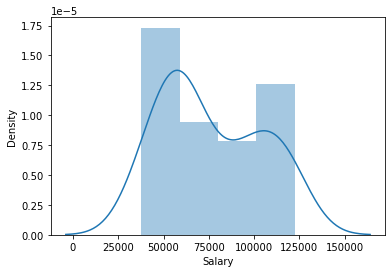

In [40]:
sns.distplot(data['Salary'])

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

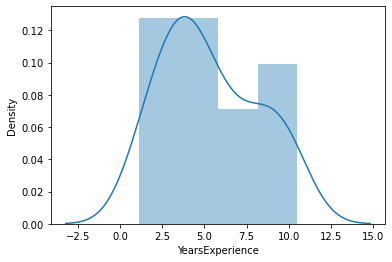

In [41]:
sns.distplot(data['YearsExperience'])

In [28]:
data.corr()
#strongly correlated

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [57]:
data=data.rename(columns={'YearsExperience':'Exp'})

In [58]:
data=data.rename(columns={'Salary':'Sal'})

In [59]:
data.head()

,Exp,Sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<AxesSubplot:xlabel='Exp', ylabel='Sal'>

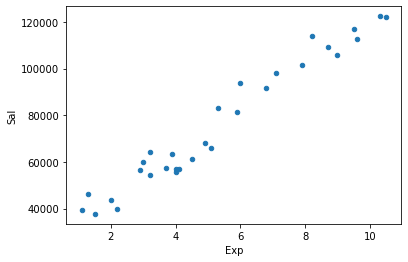

In [60]:
data.plot.scatter(x='Exp',y='Sal')

In [ ]:
#Model building

In [74]:
model=smf.ols("Exp~Sal",data=data).fit()
model

<AxesSubplot:xlabel='Exp', ylabel='Sal'>

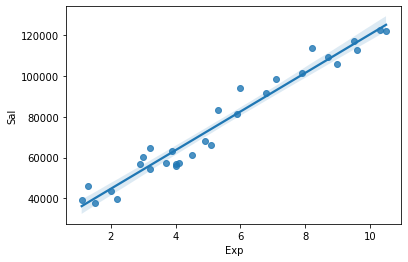

In [75]:
sns.regplot(x='Exp',y='Sal',data=data)

In [35]:
model.params
#parameters

Intercept   -2.383161
Sal          0.000101
dtype: float64

In [36]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Exp   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 29 Dec 2021   Prob (F-statistic):           1.14e-20
Time:                        14:38:46   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Sal            0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
print(model.tvalues,'/n',model.pvalues)

Intercept    -7.281283
Sal          24.950094
dtype: float64 /n Intercept    6.300123e-08
Sal          1.143068e-20
dtype: float64


In [38]:
d1=data.iloc[:,]

In [39]:
data_p=pd.DataFrame(d1,columns=['Sal'])

In [40]:
dp=model.predict(data_p)
dp

0      1.600934
1      2.295819
2      1.437694
3      2.024427
4      1.656428
5      3.352729
6      3.707969
7      3.130248
8      4.142905
9      3.408121
10     4.018652
11     3.266856
12     3.384628
13     3.397185
14     3.805285
15     4.496626
16     4.303310
17     6.030801
18     5.856117
19     7.129735
20     6.906748
21     7.568520
22     7.875253
23     9.142087
24     8.698442
25     8.308670
26     9.461782
27     9.022897
28    10.010845
29     9.958288
dtype: float64

In [41]:
#error
e = data.iloc[:,0]-dp
e

0    -0.500934
1    -0.995819
2     0.062306
3    -0.024427
4     0.543572
5    -0.452729
6    -0.707969
7     0.069752
8    -0.942905
9     0.291879
10   -0.118652
11    0.733144
12    0.615372
13    0.702815
14    0.694715
15    0.403374
16    0.796690
17   -0.730801
18    0.043883
19   -1.129735
20   -0.106748
21   -0.468520
22    0.024747
23   -0.942087
24    0.001558
25    0.691330
26    0.038218
27    0.577103
28    0.289155
29    0.541712
dtype: float64

In [42]:
#r^2 values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [ ]:
#The difference between rsquared and adj rsquared value is less

In [45]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(data.Sal,dp))
rmse

80634.98315876863

In [ ]:
#Doing Transformation for better results

In [64]:
d1=np.log10(data['Exp'])
d2=np.log10(data['Sal'])
datalog = pd.DataFrame(data=(d1,d2))
datalog

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Exp,0.041393,0.113943,0.176091,0.301030,0.342423,0.462398,0.477121,0.505150,0.505150,0.568202,...,0.832509,0.851258,0.897627,0.913814,0.939519,0.954243,0.977724,0.982271,1.012837,1.021189
Sal,4.594867,4.664689,4.576698,4.638739,4.600875,4.753139,4.779236,4.735958,4.809189,4.757313,...,4.962549,4.992434,5.005618,5.056188,5.039140,5.023590,5.068071,5.051673,5.087749,5.085904


In [65]:
data1=datalog.transpose()
data1.head()

,Exp,Sal
0,0.041393,4.594867
1,0.113943,4.664689
2,0.176091,4.576698
3,0.301030,4.638739
4,0.342423,4.600875


<AxesSubplot:xlabel='Exp', ylabel='Sal'>

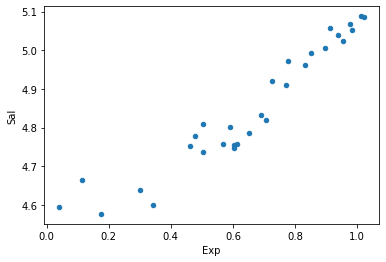

In [66]:
data1.plot.scatter(x='Exp',y='Sal')

<AxesSubplot:xlabel='Exp', ylabel='Sal'>

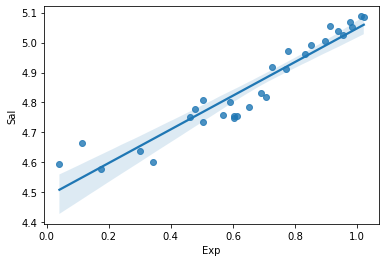

In [67]:
sns.regplot(x='Exp',y='Sal',data=data1)

In [68]:
d1=np.sqrt(data['Exp'])
d2=np.sqrt(data['Sal'])
datasq = pd.DataFrame(data=(d1,d2))
data2=datasq.transpose()

<AxesSubplot:xlabel='Exp', ylabel='Sal'>

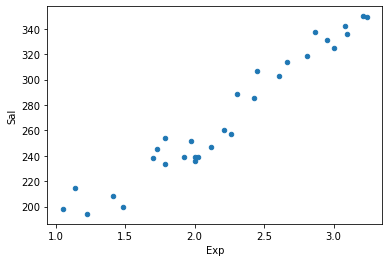

In [69]:
data2.plot.scatter(x='Exp',y='Sal')

<AxesSubplot:xlabel='Exp', ylabel='Sal'>

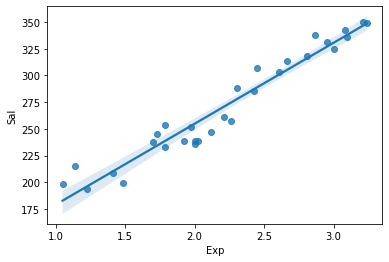

In [70]:
sns.regplot(x='Exp',y='Sal',data=data2)

In [84]:
d1=np.exp(data['Exp'])
d2=(data['Sal'])
dataexp = pd.DataFrame(data=(d1,d2))
data3=dataexp.transpose()
data3.head()

,Exp,Sal
0,3.004166,39343.0
1,3.669297,46205.0
2,4.481689,37731.0
3,7.389056,43525.0
4,9.025013,39891.0


<AxesSubplot:xlabel='Exp', ylabel='Sal'>

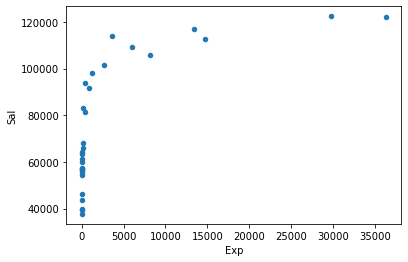

In [85]:
data3.plot.scatter(x='Exp',y='Sal')

<AxesSubplot:xlabel='Exp', ylabel='Sal'>

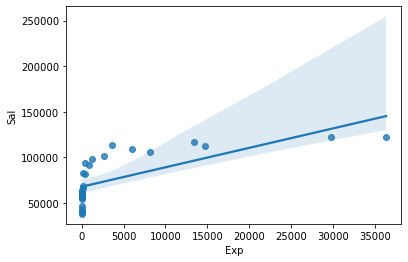

In [86]:
sns.regplot(x='Exp',y='Sal',data=data3)

In [88]:
d1=1/(data['Exp'])
d2=1/(data['Sal'])
datare= pd.DataFrame(data=(d1,d2))
data4=datare.transpose()
data4.head()

,Exp,Sal
0,0.909091,0.000025
1,0.769231,0.000022
2,0.666667,0.000027
3,0.500000,0.000023
4,0.454545,0.000025


<AxesSubplot:xlabel='Exp', ylabel='Sal'>

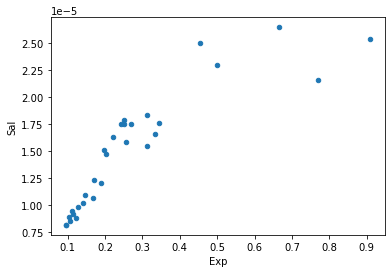

In [89]:
data4.plot.scatter(x='Exp',y='Sal')

<AxesSubplot:xlabel='Exp', ylabel='Sal'>

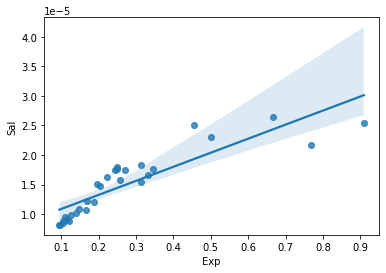

In [90]:
sns.regplot(x='Exp',y='Sal',data=data4)